# Matplotlib
`matplotlib` è una library di data visualization molto completa e facile da usare. Tramite `matplotlib` è possibile realizzare grafici chiari, informativi e precisi; guarda ad questi [esempi](https://matplotlib.org/stable/gallery/index.html) per fartene un'idea. La library è sviluppata per cooperare semplicemente con `numpy`, `pandas` e le altre librerie di calcolo scientifico/data science che vedremo nel corso.

## Esercizi
Questi esercizi ci permetteranno di familiarizzare con i fondamenti della library. Se non sei sicuro della sintassi, fai riferimento al [Matplotlib cheatsheet](https://github.com/matplotlib/cheatsheets).

### Esercizio
Importa la library e verificane la versione.

In [1]:
import matplotlib as mpl
print(mpl.__version__)

3.3.3


### Esercizio
Uno dei moduli più comuni di `matplotlib` è `pyplot` (talmente comune da avere una sua abbreviazione standard a parte). Questo modulo, dall'API ispirata a MATLAB, è al centro della realizzazione di tutte le principali tipologie di plot. Vediamo un esempio base, rappresentiamo una linea che unisca i punti di coordinate `(1, 2)` e `(3, 4)`.

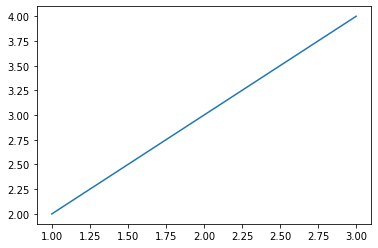

In [2]:
import matplotlib.pyplot as plt

x = [1, 3]
y = [2, 4]

plt.plot(x, y);

### Esercizio
Sfrutta le tue conoscenze di `numpy` e grafica l'andamento di $f(x) = sin(x)$ campionando 30 valori di $x$ nell'intervallo $[-\pi, \pi]$.

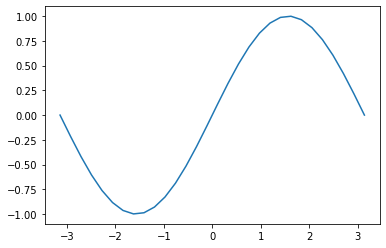

In [3]:
import numpy as np

x = np.linspace(-np.pi, np.pi, 30)
plt.plot(x, np.sin(x));

### Esercizio
Prova a ripetere l'esercizio precedente variando marker, stile e colore del plot. Per approfondire [link](https://matplotlib.org/stable/api/markers_api.html), [link](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle), [link](https://matplotlib.org/stable/gallery/color/named_colors.html).

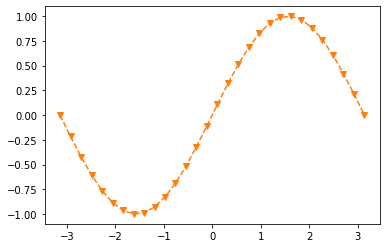

In [4]:
x = np.linspace(-np.pi, np.pi, 30)
plt.plot(x, np.sin(x), linestyle='--', marker='v', color='C1')
# plt.plot(x, np.sin(x), '--v', color='C1')

### Esercizio
Rappresenta sullo stesso piano cartesiano, tramite [scatter plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html), il risultato del campionamento ($n$ volte) di due variabili aleatorie:
* $x \sim \mathcal{N}(0, 5)$
* $y \sim \mathcal{N}(0, 5)$

prova per diversi valori di $n$.

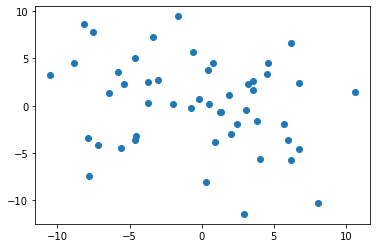

In [5]:
n = 50
x = 5*np.random.randn(n)
y = 5*np.random.randn(n)
plt.scatter(x, y)

### Esercizio
Ripeti l'esercizio precedente, ma varia la casualmente dimensione di ogni marker, variando tra *1pt* e *200pt*.

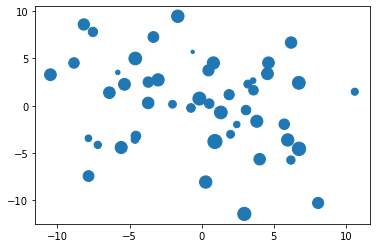

In [6]:
s = np.random.randint(1, 200, n)
plt.scatter(x, y, s)

### Esercizio (bonus)
Sfruttando quanto appreso sino a questo momento, rappresenta sullo stesso piano cartesiano le seguenti due classi di punti.
* $\mathbf{p}_i \sim \mathcal{N}(\mu, \Sigma)$ con $\mu = [0, 0]^T$ e $\Sigma = \begin{bmatrix}
1 & 0  \\
0 & 1 
\end{bmatrix}$

* $\mathbf{p'}_i \sim \mathcal{N}(\mu, \Sigma)$ con $\mu = [5, 5]^T$ e $\Sigma = \begin{bmatrix}
2 & 0  \\
0 & 2 
\end{bmatrix}$

Distingui le due classi per colore e/o marker.

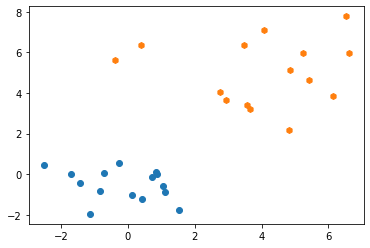

In [7]:
n = 15

p1 = np.random.randn(n, 2)
p2 = 5 + 2*np.random.randn(n, 2)

plt.plot(p1[:, 0], p1[:, 1], 'o', color='C0')
plt.plot(p2[:, 0], p2[:, 1], 'h', color='C1')

### Esercizio
`matplotlib` può essere utilizzato per realizzare plot degni di una pubblicazione scientifica di pregio, vediamo un esempio completo in un caso reale. Andiamo a graficare i dati dell'evento *GW150914* registrati al LIGO in data *14 Settembre 2015 alle ore 09:50:45 UTC*, evento passato alla storia per essere stata la prima registrazione confermata del passaggio di un'onda gravitazionale. I dati originali, campionati a *16384 Hz* sono disponibili a questo [link](https://www.gw-openscience.org/events/GW150914/). Per comodità di visualizzazione, noi ne utilizzeremo una versione sottocampionata a *546 Hz*. Oltre al dato grezzo registrato dall'inteferometro, abbiamo anche a disposizione il profilo dell'onda gravitazionale ottenuto tramite il modello fisico.
* Carica il contenuto di `'data/GW150914-observed-546Hz.csv'` ed assegnalo alla variabile `data`.
* Carica il contenuto di `'data/GW150914-waveform.csv'` ed assegnalo alla variabile `model`.
* Crea una figura specificandone dimensione e *dpi* (vedi [link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html)).
* Rappresenta il contenuto dei due file sullo stesso piano cartesiano, con il tempo come variabile indipendente.
* Distingui i due contributi per colore e marker.
* Aggiungi una legenda che chiarisca ulteriormente il contenuto del plot (vedi [link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)).
* Dai un titolo che sia parlante rispetto al contenuto.
* Assegna agli assi un'etichetta che rifletta il nome delle colonne (vedi [link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html), [link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html)).
* Fai riferimento al [cheatsheet](https://github.com/matplotlib/cheatsheets/blob/master/cheatsheets-1.png) per *arricchire* il plot di altre informazioni che ritieni possano chiarirne il contenuto.
* Salva l'immagine così ottenuta come *pdf*.

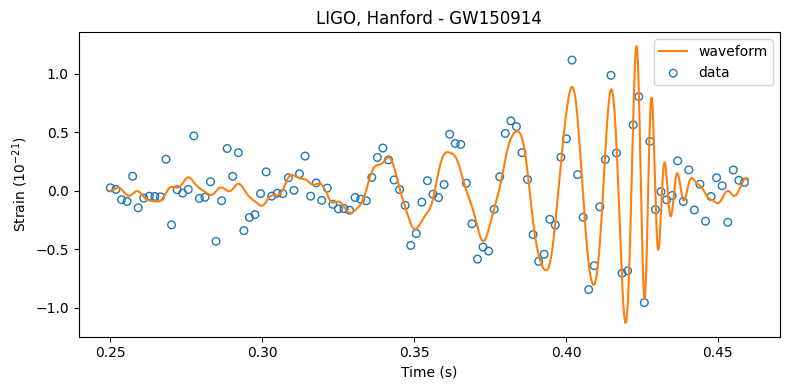

In [8]:
import pandas as pd

data = pd.read_csv('../data/GW150914-observed-546Hz.csv')
model = pd.read_csv('../data/GW150914-waveform.csv')

plt.figure(figsize=(8, 4), dpi=100)
plt.title('LIGO, Hanford - GW150914')
plt.xlabel('Time (s)')
plt.ylabel('Strain ($10^{-21}$)')
plt.scatter(data.values[:,0], data.values[:,1], label='data', linewidth=1,
            alpha=1, s=30, facecolors='none', edgecolors='C0')
plt.plot(model.values[:,0], model.values[:,1], label='waveform', color='C1')
plt.legend()
plt.tight_layout();
# plt.savefig('GW150914.pdf')

### Esercizio
Un altro tipo di plot molto diffuso, è il diagramma a barre ([*bar plot*](https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm)). Al fine di impratichirci con questa visualizzazione, andiamo a caricare in memoria la tabella relativa ai dati degli studenti, osservata nel precedente laboratorio.
* Estrai la colonna `'age'` e conta il numero di occorrenze (frequenze assolute) per ciascun valore riportato.
* Rappresenta tale informazione in un grafico a barre, riportante i valori unici crescenti di età in ascissa, ed il numero relativo di occorrenze in ordinata.
* Correda il grafico di titolo ed appropriate etichette sugli assi.

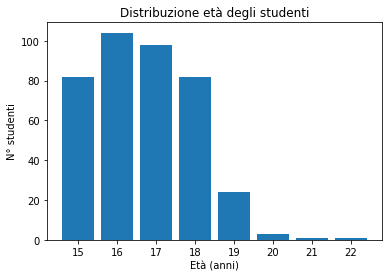

In [9]:
df = pd.read_json('../data/mat-students.json')
ages = (df['age']
        .value_counts()
        .to_frame()
        .rename({'age': 'counts'}, axis=1)
        .reset_index()
        .rename({'index': 'age'}, axis=1)
        .sort_values(by='age', ascending=False))

plt.bar(ages['age'], ages['counts'])
plt.ylabel('N° studenti')
plt.xlabel('Età (anni)')
plt.title('Distribuzione età degli studenti');

### Esercizio
`matplotlib` permette di gestire semplicemente plot multi-pannello (*subplot*). Ripeti l'esercizio precedente, questa volta rappresentando in due plot affiancati orizzontalmente, le frequenze assolute delle età degli studenti, per sesso (vedi [link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)). Correda ogni pannello di un titolo parlante rispetto al suo contenuto.

**NB:** la libray di default permette che plot multi-pannello abbiano gli assi con estremi diversi. Tuttavia, al fine di garantire la corretta leggibilità del grafico, sarà necessario standardizzarli manualmente (vedi [link](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylim.html), [link](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlim.html)).

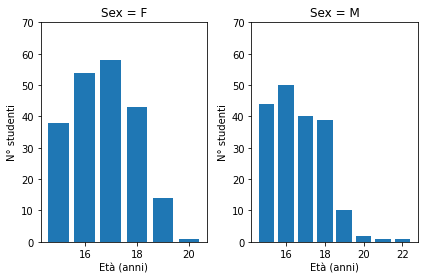

In [10]:
mf_ages = (df
           .groupby('sex')['age']
           .value_counts()
           .to_frame()
           .rename({'age': 'counts'}, axis=1)
           .reset_index())

fig, ax = plt.subplots(1, 2)

ax[0].bar(mf_ages.loc[mf_ages['sex'] == 'F', 'age'], mf_ages.loc[mf_ages['sex'] == 'F', 'counts'])
ax[0].set_ylim([0, 70])
ax[0].set_title('Sex = F')
ax[0].set_ylabel('N° studenti')
ax[0].set_xlabel('Età (anni)')
ax[1].bar(mf_ages.loc[mf_ages['sex'] == 'M', 'age'], mf_ages.loc[mf_ages['sex'] == 'M', 'counts'])
ax[1].set_ylim([0, 70])
ax[1].set_title('Sex = M')
ax[1].set_ylabel('N° studenti')
ax[1].set_xlabel('Età (anni)')
plt.tight_layout()

### Esercizio (bonus)
Ripeti l'esercizio precedente, questa volta distinguendo con due colori diversi il numero relativo di maschi e di femmine nello stesso piano cartesiano. Correda il plot di una legenda. Puoi seguire questo [esempio](https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html).

In [11]:
m_ages = (mf_ages
          .loc[mf_ages['sex'] == 'M', ['age', 'counts']]
          .set_index('age')
          .reindex(ages['age'])
          .fillna(0)
          .reset_index())
f_ages = (mf_ages
          .loc[mf_ages['sex'] == 'F', ['age', 'counts']]
          .set_index('age')
          .reindex(ages['age'])
          .fillna(0)
          .reset_index())

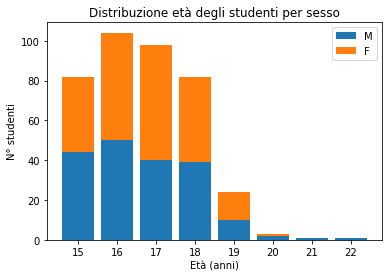

In [12]:
plt.bar(m_ages['age'], m_ages['counts'], label='M')
plt.bar(f_ages['age'], f_ages['counts'], bottom=m_ages['counts'], label='F')
plt.ylabel('N° studenti')
plt.xlabel('Età (anni)')
plt.legend()
plt.title('Distribuzione età degli studenti per sesso');

### Esercizio
`matplotlib` può essere usato anche per visualizzare immagini e/o fotografie. Prova ad esempio a caricare l'immagine contenuta in `data/cat.jpg` assegnandone il contenuto alla variabile `img` (vedi [link](https://matplotlib.org/stable/tutorials/introductory/images.html)). Di che tipo è `img`? Che dimensione ha?

Visualizza poi la fotografia (vedi [link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)).

In [13]:
# img = mpl.image.imread('../data/cat.jpg')
# print(type(img), img.shape)
# plt.imshow(img);

### Esercizio
Un concetto sul quale ci soffermeremo a lungo durante il corso è quello dell'[esplorazione](https://en.wikipedia.org/wiki/Exploratory_data_analysis) dei dati in nostro possesso. In questo passo, preliminare ad ogni reale use case, ci ritroveremo spesso a chiederci se due variabili siano tra esse *correlate*. `matplotlib` può aiutarci ad investigare in questa direzione, anche se solo maniera visuale.

Prendendo come riferimento il dataset degli studenti, calcola la matrice di correlazione tra i voti e, sfruttando quanto appreso, visualizzala graficamente. Per approfondire [link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yticks.html), [link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html), [link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html).

,G1,G2,G3
G1,1.000000,0.852118,0.801468
G2,0.852118,1.000000,0.904868
G3,0.801468,0.904868,1.000000


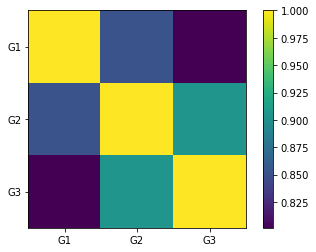

In [14]:
grades = ['G1', 'G2', 'G3']
corr = df[grades].corr()
display(corr)

plt.imshow(corr)
plt.colorbar()
plt.yticks(range(len(grades)), grades)
plt.xticks(range(len(grades)), grades);

### Esercizio (bonus)
Dall'esercizio predecedente, identifica la coppia di variabili diverse con correlazione maggiore. Come potresti proseguirne l'ispezione visiva?

Text(0, 0.5, 'G3')

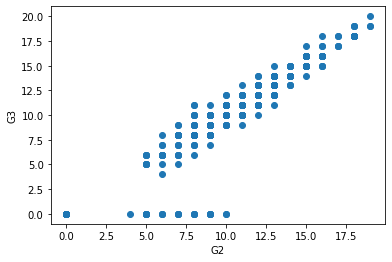

In [15]:
plt.scatter(df['G2'], df['G3'])
plt.xlabel('G2')
plt.ylabel('G3')

### Esercizio (bonus)
Sfrutta quanto hai imparato per visualizzare l'andamento di $$f(x,y) = \sin(x) + \cos(10 + yx)\cdot\cos(x)$$ con $x$ ed $y$ che variano nell'intervallo $[0, 5]$. Cosa succede al variare del valore del keyword argument `interpolation`? Per approfondire [link](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html), [link](https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html).

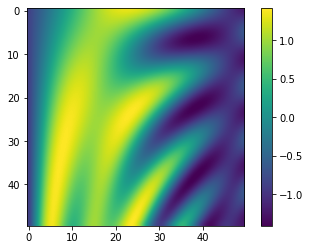

In [16]:
def f(x, y):
    return np.sin(x)  + np.cos(10 + y * x) * np.cos(x)

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.imshow(Z, interpolation='spline16')
plt.colorbar()

# Altre risorse utili

* `pandas` ha un modulo di visualizzazione basato su `matplotlib` che può risultare utile in fase di data exploration. Per approfondire [link](https://pandas.pydata.org/docs/user_guide/visualization.html).
* `seaborn` è un'altra (delle tante) library di data visualization di Python. Molto ben integrata con `pandas`, e basata su `matplotlib`, può spesso essere utile per creare velocemente plot accattivanti. Per approfondire [link](https://seaborn.pydata.org/examples/index.html).